# Método Compuesto de Simpson 3/8
## Andrade Vidal Fernando Adrian
### ¿Qué es el metodo de Simpson 3/8 compuesto?

Método de integración para calcular integrales definidas donde se conectan grupos sucesivos de tres puntos sobre la curva mediante polinomios de tercer grado. A las fórmulas que resultan de calcular la integral bajo estos polinomios se les llama Reglas de Simpson.

El metodo compuesto tiene como diferencía que podemos definir multiples intervalos como en la regla del trapecio para poder aproximar mejor el área, en este cuadernillo se tratara un ejemplo de esta especie, ya que el metodo simpson 3/8 es menos preciso que este.

#### Características
+ La función debe ser continua y positiva en el intervalo dado.
+ Es un poco más dificil la fórmula.
+ La aproximación es mejor que con la regla de Simpson 1/3.
+ El número de intervalos "n" debe ser un multiplo de 3 para poder utilizar este metodo.

A continuación se muesta una imagen para entender mejor el metodo.

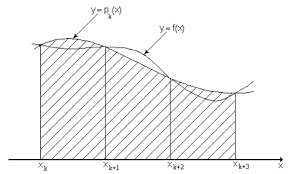

In [2]:
from sympy import * #Usaremos SymPy para computo simbólico.
from math import e

import pandas as pd #Usaremos Pandas para crear y manejar data frames donde registraremos los datos.

import IPython.display as disp #Usaremos el display para visualizar ecuaciones.

In [3]:
#Declaramos los simbolos que usaremos para las ecuaciónes.

x = symbols('x')

#Insertamos la función de la cual queremos calcular su integral:

funcion = (e**x**2)

#Insertamos los limites de integración:

limite_inferior = 0
limite_superior = 1

#Aqui calcularemos el espaciamiento que tiene que haber entre los trapecios, para esto necesitamos tambien saber n
#n corresponde a los intervalos usados, recordar debe ser un número multiplo de 3.

intervalos = 6 #Recuerda que debe ser un número multiplo de 3

espaciamiento = (limite_superior - limite_inferior)/intervalos

#En esta parte iremos calculando los puntos que ira cortando el trapecio.
#Es decir construimos una tabla con los valores que necesitaremos.

df = pd.DataFrame()
espacio = limite_inferior

while espacio <= limite_superior:
    
    df = df.append({'x':espacio,
                    'y':funcion.subs({x:espacio})}, 
                    ignore_index=True)
    espacio += espaciamiento
    
display(df)

,x,y
0,0.000000,1
1,0.166667,1.02816717743771
2,0.333333,1.11751906874186
3,0.500000,1.28402541668774
4,0.666667,1.55962349760678
5,0.833333,2.00259621139054
6,1.000000,2.71828182845904


Ya que construimos nuestra tabla con los datos que utilizaremos, podemos aplicar la siguiente fórmula:

*Nota: En esta fórmula hay que tener en cuenta que los valores de y son los valores de la función.

$ \frac{3\cdot h}{8}\left[f(a) + 3 \displaystyle\sum_{i=1,4,7}^{n-2} f(x_i) +3\displaystyle\sum_{j=2,5,8}^{n-1} f(x_j)+2\displaystyle\sum_{m=3,6,9}^{n-3} f(x_m)+ f(b) \right]$

In [7]:
#Aqui vamos recorriendo nuestros datos recolectados para ir realizando las operaciones necesarias:
resultado = 0

for i in range(len(df.index)):
    if i == 0:
        sumatoria = ((espaciamiento*3)/8) * (df['y'][i])   
    elif (i < len(df.index) and i % 3 == 0):
        sumatoria += ((espaciamiento*3)/8) * (2 * df['y'][i])
    elif( i < len(df.index) and i % 3 !=0 ):
        sumatoria += ((espaciamiento*3)/8) * (3*df['y'][i])
    elif( i == len(df.index)):
        sumatoria += ((espaciamiento*3)/8) * (df['y'][i])

resultado = sumatoria #Solo asignamos toda la sumatoria al resultado total para presentarlo por debajo.

**Es muy importante recordar que la función debe ser positiva en ese intervalo dado para evitar problemas, teniendo eso en mente aquí se presenta el resultado de la integral insertada**

$\int_a^b f(x) = $ 

In [8]:
print("De la siguiente función:")
display(funcion)
print("El resultado aproximado es:")
display(resultado)

De la siguiente función:


2.71828182845905**(x**2)

El resultado aproximado es:


1.63302077223902